In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
#%matplotlib notebook
sns.set(rc={'figure.figsize':(11.7,8.27)})
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ks_2samp
import scipy.stats as stats
from scipy.stats import ttest_rel
from itertools import product
from itertools import combinations,combinations_with_replacement

In [3]:
data = pd.read_excel(r'CATALIST UK EXXON V4 2019.xlsx',sheetname='essoSites')

In [22]:
data2 = data.loc[:,(data.isnull().sum().sort_values(ascending=False))/len(data)<= 0.3]

In [25]:
(data2.isnull().sum().sort_values(ascending=False))/len(data2)

Primary Road Number        0.10
Hand Car Wash              0.04
Coffee Offer Brand         0.04
Customer Toilets           0.04
ATM Name                   0.03
CTPS OPT-OUT               0.00
Location Type              0.00
Shop Type                  0.00
Shop                       0.00
Car Wash                   0.00
Catering                   0.00
Service Bays               0.00
ATM                        0.00
24 Hours                   0.00
Closing Time               0.00
Opening Time               0.00
Plot Size Front            0.00
Plot Size Depth            0.00
Plot Size Area             0.00
Development Year           0.00
Quality                    0.00
Access                     0.00
Visibility                 0.00
Share Brand                0.00
Pri Traffic                0.00
Ownership                  0.00
LPG                        0.00
Other Fuel                 0.00
Carriageway Barrier        0.00
PBL                        0.00
                           ... 
Catering

In [32]:
# no of unique values in the data / cardinality test for the data # drop any value which has cardinality 
data2.apply(lambda x: x.nunique()).sort_values(ascending=False)

Cat Number                  198
Postcode                    198
Positioned Y                198
PBL                         198
Site Name                   198
Positioned X                198
Telephone                   198
Street                      177
Primary Road Number         152
Town                        138
Local Authority Area        135
Survey Date                 128
COUNTY                       71
Plot Size Area               46
Shop Sales                   39
MF Volume                    39
Development Year             25
Shop Area                    22
Dedicated Spaces             19
Plot Size Depth              15
Plot Size Front              14
Region                       11
MF Pumps                      7
MF Positions                  7
ATM Name                      6
Closing Time                  5
Opening Time                  5
Coffee Offer Brand            5
Forecourt Layout              5
Location Type                 4
                           ... 
HGV Posi

In [35]:
count_1 = data2.columns[data2.apply(lambda x: x.nunique())==1]

In [39]:
data3 = data2.drop(count_1,axis=1)

In [43]:
data2['ATM Name'].value_counts()

ROYAL BANK OF SCOTLAND / TESCO       84
ROYAL BANK OF SCOTLAND               67
CASHLINE / ROYAL BANK OF SCOTLAND    34
TESCO                                 6
CASHZONE MACHINE                      1
BARCLAYS                              1
Name: ATM Name, dtype: int64

In [41]:
cols_exclude = []

(198, 70)

In [44]:
data3.to_pickle('data3.pkl')

In [46]:
pd.Series(data3.columns).to_csv('cols_site.csv')

In [4]:
df_tesco = pd.read_pickle(r'df_tesco_marker_V3.pkl')

df_site_agg = df_tesco.groupby(['Site Name','PBL'])[['Total Sales Value','exclShopSales','volumeADO',\
       'volumeUL95','shopSalesFromFuel','totalSalesEsso','UL 95_ Approved Price Vs Marker Price',\
       'ADO_ Approved Price Vs Marker Price']].agg({'median_':'median','sum_':'sum'}).reset_index()

df_site_agg.columns = [''.join(col).strip() for col in df_site_agg.columns.values]

In [10]:
df_site_agg.head()

Site Name        PBL  median_Total Sales Value  \
0  ABBEY ST ACCRNGTN EXP 200,911.00                 27,171.61   
1       ABINGTON EXPRESS 200,740.00                 27,546.10   
2  ACKLAM RD MIDSBRO EXP 328,841.00                 47,079.60   
3          ACTON EXPRESS 300,931.00                 25,430.91   
4     ADDISCOMBE EXPRESS 201,307.00                 26,765.42   

   median_exclShopSales  median_volumeADO  median_volumeUL95  \
0              8,831.34          7,766.00           5,230.00   
1              5,548.02          8,214.00           6,624.00   
2             13,887.97         13,504.00          10,258.00   
3             11,512.44          4,203.00           4,608.00   
4             12,102.10          4,417.00           5,427.00   

   median_shopSalesFromFuel  median_totalSalesEsso  \
0                  2,040.57              16,556.30   
1                  2,721.98              19,222.17   
2                  2,491.70              30,532.86   
3                  2,037.63              11,667.17   
4                  1,784.23              12,920.83   

   median_UL 95_ Approved Price Vs Marker Price  \
0                                          0.60   
1                                          0.50   
2                                          0.20   
3                                          0.00   
4                                          1.20   

   median_ADO_ Approved Price Vs Marker Price  sum_Total Sales Value  \
0                                        0.84           9,185,455.52   
1                                        0.40           8,858,849.94   
2                                        1.00          15,993,093.21   
3                                        0.20           8,014,935.37   
4                                        1.33           8,875,985.78   

   sum_exclShopSales  sum_volumeADO  sum_volumeUL95  sum_shopSalesFromFuel  \
0       3,021,131.60   2,569,326.00    1,749,749.00             686,510.65   
1       1,820,755.57   2,605,391.00    2,129,248.00             877,552.85   
2       4,760,236.36   4,568,066.00    3,547,376.00             847,040.69   
3       3,703,962.76   1,290,582.00    1,469,198.00             653,514.46   
4       4,078,084.46   1,413,984.00    1,810,194.00             588,797.16   

   sum_totalSalesEsso  sum_UL 95_ Approved Price Vs Marker Price  \
0        5,477,813.27                                     248.79   
1        6,160,541.52                                     171.16   
2       10,385,816.16                                     116.02   
3        3,657,458.15                                     153.98   
4        4,209,104.16                                     423.01   

   sum_ADO_ Approved Price Vs Marker Price  
0                                   357.64  
1                                   117.73  
2                                   227.74  
3                                   225.15  
4                                   404.07

In [5]:
data3 = pd.read_pickle('data3.pkl')

In [13]:
data3.head()

Cat Number     PBL           Site Name         Street      Town  \
0          51  200571  FORESTHILL EXPRESS    LONDON ROAD    LONDON   
1          56  200902  TULSE HILL EXPRESS           A204    LONDON   
2          57  311928   STOCKWELL EXPRESS   BRIXTON ROAD    LONDON   
3          85  301694      BARNES EXPRESS      CASTELNAU    LONDON   
4         106  200838    STANMORE EXPRESS  HONEYPOT LANE  STANMORE   

         COUNTY  Region  Local Authority Area  Postcode Primary Road Number  \
0  INNER LONDON  LONDON              LEWISHAM  SE23 3PE                A205   
1  INNER LONDON  LONDON               LAMBETH   SW2 2QB                A204   
2  INNER LONDON  LONDON               LAMBETH   SW9 7AA                 A23   
3  OUTER LONDON  LONDON  RICHMOND UPON THAMES  SW13 9EW                A306   
4  OUTER LONDON  LONDON                HARROW   HA7 1JN               A4140   

    Telephone  Positioned X  Positioned Y LPG    Location Type Car Wash  \
0  2032817900         -0.06         51.44  NO  URBAN TRANSIENT       NO   
1  2032802840         -0.11         51.45  NO  URBAN TRANSIENT       NO   
2  2032856170         -0.11         51.47  NO  URBAN TRANSIENT       NO   
3  2032857560         -0.23         51.48  NO  URBAN TRANSIENT       NO   
4  2032816470         -0.29         51.60  NO  URBAN TRANSIENT       NO   

  Catering Service Bays  ATM                           ATM Name 24 Hours  \
0       NO           NO  YES  CASHLINE / ROYAL BANK OF SCOTLAND       NO   
1       NO           NO  YES             ROYAL BANK OF SCOTLAND       NO   
2       NO           NO  YES  CASHLINE / ROYAL BANK OF SCOTLAND       NO   
3       NO           NO  YES     ROYAL BANK OF SCOTLAND / TESCO      YES   
4       NO           NO  YES     ROYAL BANK OF SCOTLAND / TESCO       NO   

  Opening Time Closing Time  Plot Size Front  Plot Size Depth  Plot Size Area  \
0        06:00        23:00               65               35            2275   
1        07:00        23:00               40               70            2800   
2        06:00        24:00               25               75            1875   
3        00:00        24:00               65               35            2275   
4        06:00        24:00               65               40            2600   

   Development Year Quality  Access Visibility Pri Traffic     Sec Traffic  \
0              2007    GOOD  MEDIUM       GOOD        GOOD  NOT APPLICABLE   
1              2001    GOOD  MEDIUM       GOOD        GOOD  NOT APPLICABLE   
2              2000    GOOD  MEDIUM     MEDIUM        GOOD  NOT APPLICABLE   
3              1992    GOOD    GOOD       GOOD        GOOD  NOT APPLICABLE   
4              2006    GOOD  MEDIUM       GOOD        GOOD          MEDIUM   

  Carriageway Barrier Highly Transient Traffic Speed Forecourt Layout  \
0                NONE              YES    40-60 KM/H     STARTER GATE   
1                NONE               NO    40-60 KM/H     STARTER GATE   
2                NONE              YES    40-60 KM/H     STARTER GATE   
3                NONE              YES      <40 KM/H           DOMINO   
4        FULL BARRIER              YES    40-60 KM/H           SQUARE   

   MF Pumps  MF Positions  HGV Pumps  HGV Positions  LPG Pumps  LPG Positions  \
0         3             6          0              0          0              0   
1         3             6          0              0          0              0   
2         3             6          0              0          0              0   
3         6            12          0              0          0              0   
4         3             6          0              0          0              0   

  MPDs  MF Volume Automat Service Diesel Only Cards Customer Toilets  \
0  YES       5700              NO                NO               NO   
1  YES       5200              NO                NO              YES   
2  YES       6500              NO                NO               NO   
3  YES       5700            

In [6]:
df_site_agg_2  = data3.merge(df_site_agg,how='left',on='PBL')

In [15]:
df_site_agg_2.head()

Cat Number     PBL         Site Name_x         Street      Town  \
0          51  200571  FORESTHILL EXPRESS    LONDON ROAD    LONDON   
1          56  200902  TULSE HILL EXPRESS           A204    LONDON   
2          57  311928   STOCKWELL EXPRESS   BRIXTON ROAD    LONDON   
3          85  301694      BARNES EXPRESS      CASTELNAU    LONDON   
4         106  200838    STANMORE EXPRESS  HONEYPOT LANE  STANMORE   

         COUNTY  Region  Local Authority Area  Postcode Primary Road Number  \
0  INNER LONDON  LONDON              LEWISHAM  SE23 3PE                A205   
1  INNER LONDON  LONDON               LAMBETH   SW2 2QB                A204   
2  INNER LONDON  LONDON               LAMBETH   SW9 7AA                 A23   
3  OUTER LONDON  LONDON  RICHMOND UPON THAMES  SW13 9EW                A306   
4  OUTER LONDON  LONDON                HARROW   HA7 1JN               A4140   

    Telephone  Positioned X  Positioned Y LPG    Location Type Car Wash  \
0  2032817900         -0.06         51.44  NO  URBAN TRANSIENT       NO   
1  2032802840         -0.11         51.45  NO  URBAN TRANSIENT       NO   
2  2032856170         -0.11         51.47  NO  URBAN TRANSIENT       NO   
3  2032857560         -0.23         51.48  NO  URBAN TRANSIENT       NO   
4  2032816470         -0.29         51.60  NO  URBAN TRANSIENT       NO   

  Catering Service Bays  ATM                           ATM Name 24 Hours  \
0       NO           NO  YES  CASHLINE / ROYAL BANK OF SCOTLAND       NO   
1       NO           NO  YES             ROYAL BANK OF SCOTLAND       NO   
2       NO           NO  YES  CASHLINE / ROYAL BANK OF SCOTLAND       NO   
3       NO           NO  YES     ROYAL BANK OF SCOTLAND / TESCO      YES   
4       NO           NO  YES     ROYAL BANK OF SCOTLAND / TESCO       NO   

  Opening Time Closing Time  Plot Size Front  Plot Size Depth  Plot Size Area  \
0        06:00        23:00               65               35            2275   
1        07:00        23:00               40               70            2800   
2        06:00        24:00               25               75            1875   
3        00:00        24:00               65               35            2275   
4        06:00        24:00               65               40            2600   

   Development Year Quality  Access Visibility Pri Traffic     Sec Traffic  \
0              2007    GOOD  MEDIUM       GOOD        GOOD  NOT APPLICABLE   
1              2001    GOOD  MEDIUM       GOOD        GOOD  NOT APPLICABLE   
2              2000    GOOD  MEDIUM     MEDIUM        GOOD  NOT APPLICABLE   
3              1992    GOOD    GOOD       GOOD        GOOD  NOT APPLICABLE   
4              2006    GOOD  MEDIUM       GOOD        GOOD          MEDIUM   

  Carriageway Barrier Highly Transient Traffic Speed Forecourt Layout  \
0                NONE              YES    40-60 KM/H     STARTER GATE   
1                NONE               NO    40-60 KM/H     STARTER GATE   
2                NONE              YES    40-60 KM/H     STARTER GATE   
3                NONE              YES      <40 KM/H           DOMINO   
4        FULL BARRIER              YES    40-60 KM/H           SQUARE   

   MF Pumps  MF Positions  HGV Pumps  HGV Positions  LPG Pumps  LPG Positions  \
0         3             6          0              0          0              0   
1         3             6          0              0          0              0   
2         3             6          0              0          0              0   
3         6            12          0              0          0              0   
4         3             6          0              0          0              0   

  MPDs  MF Volume Automat Service Diesel Only Cards Customer Toilets  \
0  YES       5700              NO                NO               NO   
1  YES       5200              NO                NO              YES   
2  YES       6500              NO                NO               NO   
3  YES       5700            

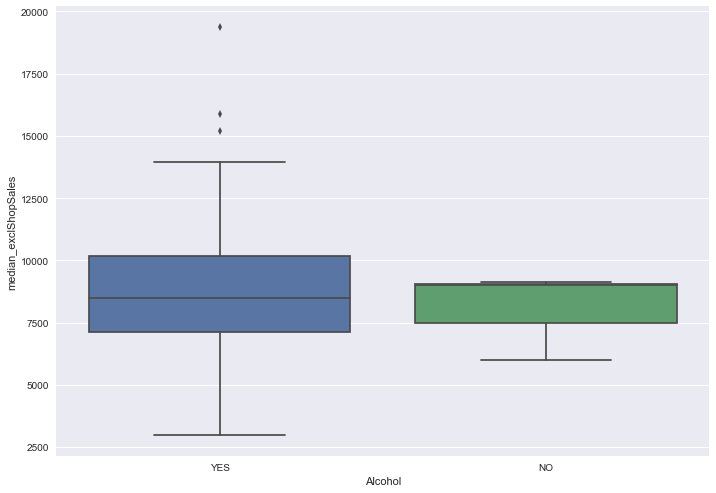

In [16]:
sns.boxplot(x="Alcohol", y="median_exclShopSales", data=df_site_agg_2)

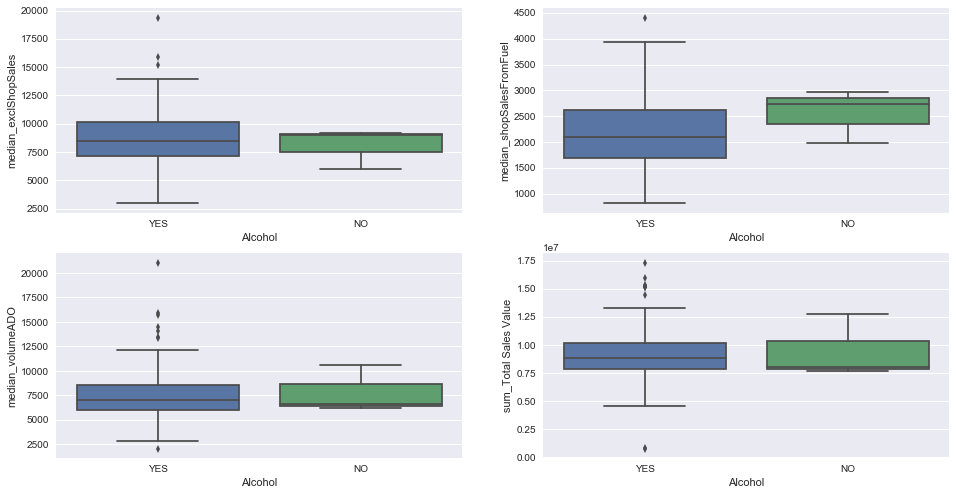

In [92]:
sns.set(rc={'figure.figsize':(16,8.27)})
fig, ax = plt.subplots(2, 2)
sns.boxplot(x="Alcohol", y="median_exclShopSales", data=df_site_agg_2,ax=ax[0, 0])
sns.boxplot(x="Alcohol", y="median_shopSalesFromFuel", data=df_site_agg_2,ax=ax[0, 1])
sns.boxplot(x="Alcohol", y="median_volumeADO", data=df_site_agg_2,ax=ax[1, 0])
sns.boxplot(x="Alcohol", y="sum_Total Sales Value", data=df_site_agg_2,ax=ax[1, 1])

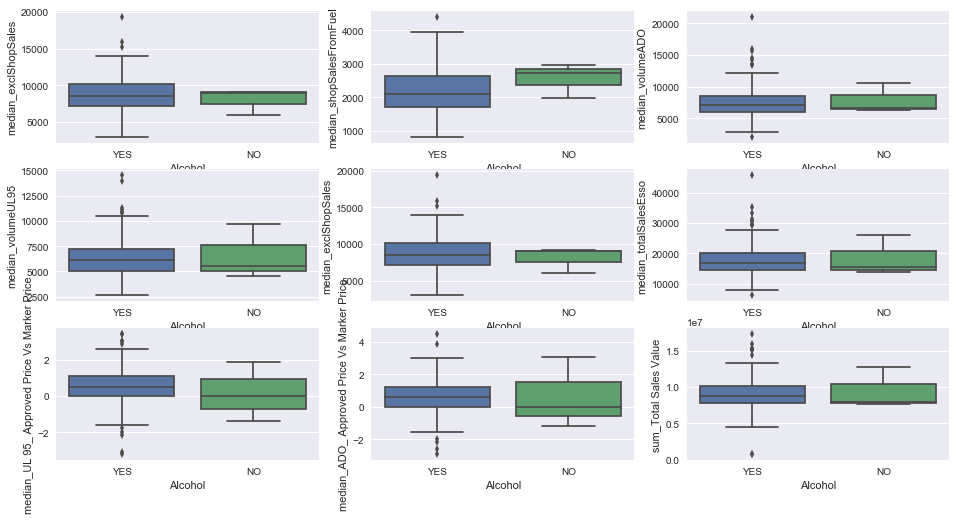

In [25]:
#sns.set(rc={'figure.figsize':(16,8.27)})
fig, ax = plt.subplots(3, 3)
sns.boxplot(x="Alcohol", y="median_exclShopSales", data=df_site_agg_2,ax=ax[0, 0])
sns.boxplot(x="Alcohol", y="median_shopSalesFromFuel", data=df_site_agg_2,ax=ax[0, 1])
sns.boxplot(x="Alcohol", y="median_volumeADO", data=df_site_agg_2,ax=ax[0,2])
sns.boxplot(x="Alcohol", y="median_volumeUL95", data=df_site_agg_2,ax=ax[1, 0])
sns.boxplot(x="Alcohol", y="median_exclShopSales", data=df_site_agg_2,ax=ax[1, 1])
sns.boxplot(x="Alcohol", y="median_totalSalesEsso", data=df_site_agg_2,ax=ax[1, 2])
sns.boxplot(x="Alcohol", y='median_UL 95_ Approved Price Vs Marker Price', data=df_site_agg_2,ax=ax[2, 0])
sns.boxplot(x="Alcohol", y='median_ADO_ Approved Price Vs Marker Price', data=df_site_agg_2,ax=ax[2, 1])
sns.boxplot(x="Alcohol", y='sum_Total Sales Value', data=df_site_agg_2,ax=ax[2, 2])
fig.tight_layout()
#fig.subplots_adjust()
plt.savefig(img_name)

In [62]:
cols = pd.read_excel(r'cols_site.xlsx').query('is_sel==1')['cols'].tolist()[4:]
path = "D:\\UK PVO\\siteDataPrep\\site_data_attr_plots\\"

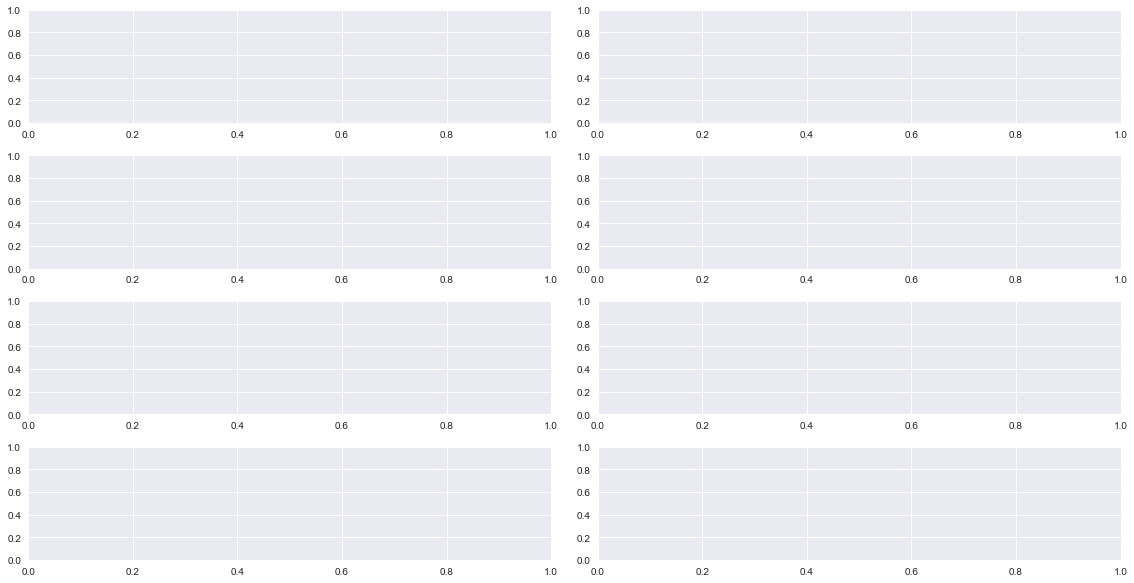

In [75]:
sns.set(rc={'figure.figsize':(16,8.27)})
fig, ax = plt.subplots(4,2)
fig.tight_layout()
#axs = list(product([0,1,2,3], repeat=2))
axs = list(product([0,1,2,3],[0,1]))
y_vals = [ 'median_Total Sales Value','median_exclShopSales', 'median_volumeADO', 'median_volumeUL95',\
           'median_shopSalesFromFuel', 'median_totalSalesEsso','median_UL 95_ Approved Price Vs Marker Price',\
           'median_ADO_ Approved Price Vs Marker Price']

In [76]:
for col in cols[4:]:
    print(col)
    try:
        for axx,y_val in zip(axs,y_vals):
                sns.boxplot(x=col, y=y_val, data=df_site_agg_2,showfliers=False,ax=ax[axx])    
        fig.savefig(path+"effect_of_"+str(col)+"_.png")
        fig, ax = plt.subplots(4,2)
        fig.tight_layout()
    except Exception as e:
        print(e)

Plot Size Depth
Plot Size Area
Development Year
Quality
Access
Visibility
Pri Traffic
Sec Traffic
Carriageway Barrier
Highly Transient
Traffic Speed
Forecourt Layout
MF Pumps
MF Positions
HGV Pumps
HGV Positions
LPG Pumps
LPG Positions
MPDs
MF Volume
Automat Service
Diesel Only Cards
Customer Toilets
Shop Area
Shop Sales
Shop Quality
Dedicated Spaces
Pedestrian Customers
Shop Competition
Alcohol
Lottery
object too deep for desired array
Take Away Food
Hot Drinks
Microwave
In Store Bakery
Coffee Offer Brand


KeyboardInterrupt: 

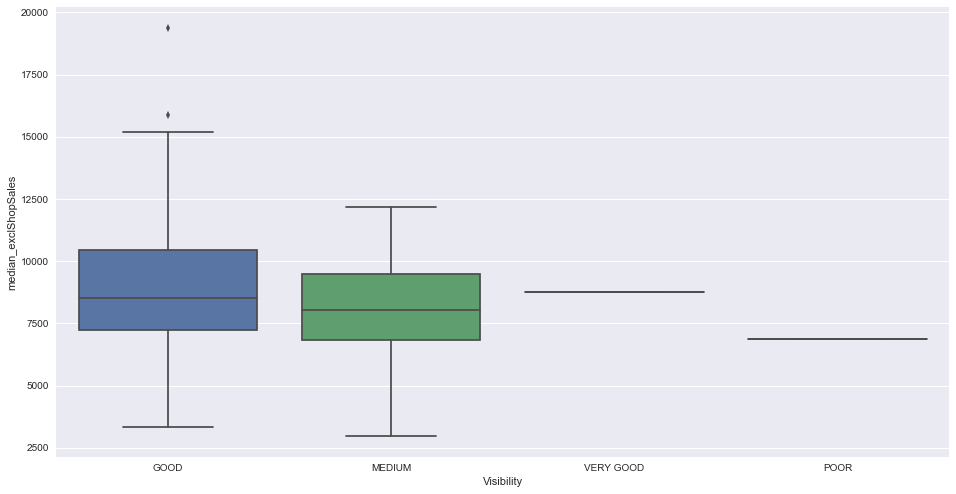

In [77]:
sns.boxplot(x="Visibility", y="median_exclShopSales", data=df_site_agg_2)

In [80]:
for axx,y_val in zip(axs,y_vals):
    print(axx,y_val)
    sns.boxplot(x=cols[4:][0], y=y_val, data=df_site_agg_2,showfliers=False,ax=ax[axx])

(0, 0) median_Total Sales Value
(0, 1) median_exclShopSales
(1, 0) median_volumeADO
(1, 1) median_volumeUL95
(2, 0) median_shopSalesFromFuel
(2, 1) median_totalSalesEsso
(3, 0) median_UL 95_ Approved Price Vs Marker Price
(3, 1) median_ADO_ Approved Price Vs Marker Price


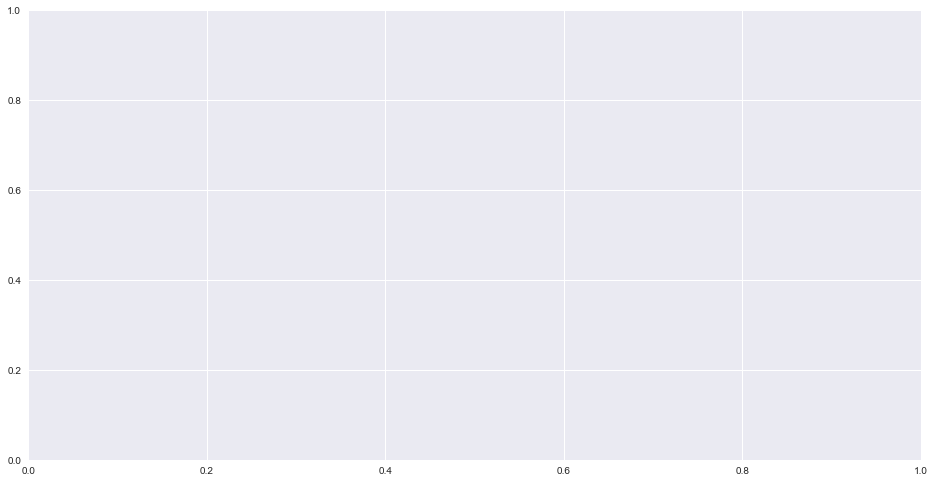

In [88]:
fig, ax = plt.subplots(1,1)

In [91]:
sns.boxplot(x=cols[4:][0], y=y_val, data=df_site_agg_2,showfliers=False,ax=ax)

In [93]:
cols[4:][0]

'Plot Size Depth'

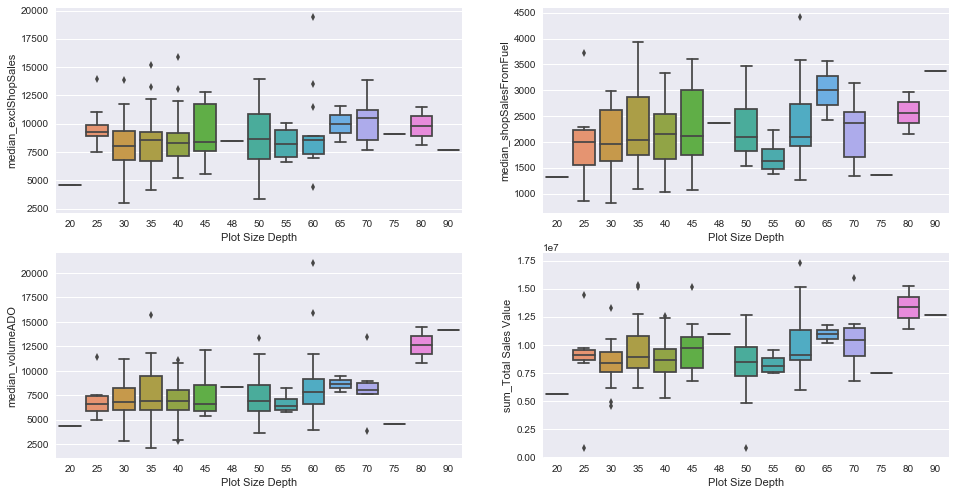

In [94]:
sns.set(rc={'figure.figsize':(16,8.27)})
fig, ax = plt.subplots(2, 2)
sns.boxplot(x='Plot Size Depth', y="median_exclShopSales", data=df_site_agg_2,ax=ax[0, 0])
sns.boxplot(x='Plot Size Depth', y="median_shopSalesFromFuel", data=df_site_agg_2,ax=ax[0, 1])
sns.boxplot(x='Plot Size Depth', y="median_volumeADO", data=df_site_agg_2,ax=ax[1, 0])
sns.boxplot(x='Plot Size Depth', y="sum_Total Sales Value", data=df_site_agg_2,ax=ax[1, 1])

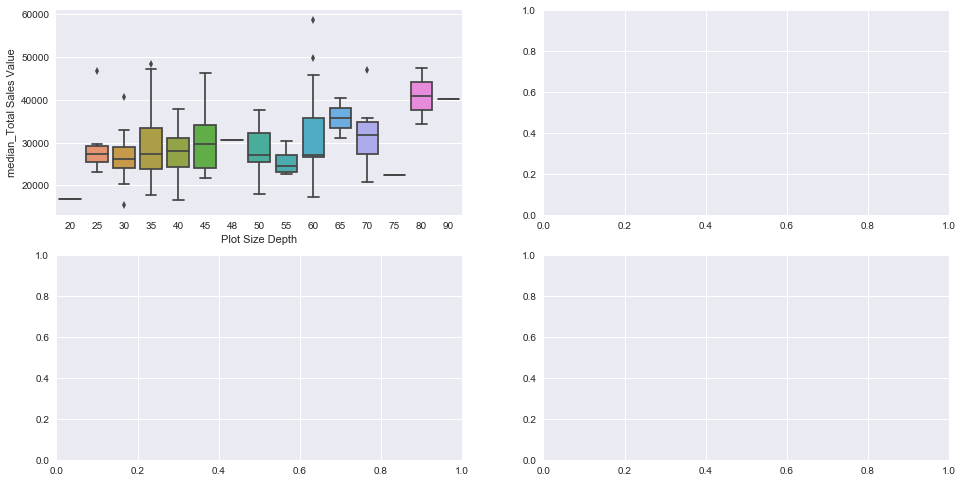

In [106]:
sns.set(rc={'figure.figsize':(16,8.27)})
fig, ax = plt.subplots(2, 2)
sns.boxplot(x=cols[4:][0], y=y_vals[0], data=df_site_agg_2,ax=ax[axs[0]])

In [101]:
axs[0]

(0, 0)

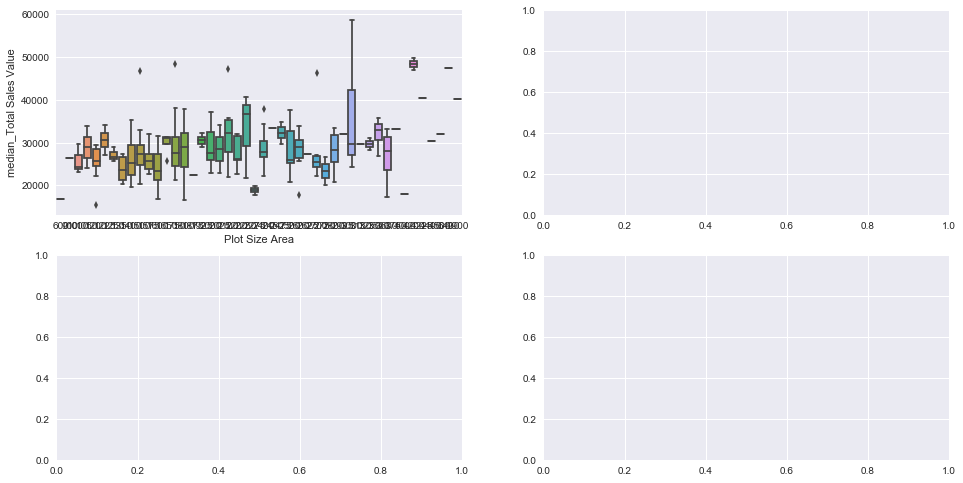

In [107]:
fig, ax = plt.subplots(2, 2)
sns.boxplot(x=cols[4:][1], y=y_vals[0], data=df_site_agg_2,ax=ax[axs[0]])

In [1]:
sns.set(rc={'figure.figsize':(20,16)})
for col in cols[4:]:
    print(col)
    try:
        fig, axes = plt.subplots(4,2)
        #fig.tight_layout()
        fig.subplots_adjust(hspace=0.5)
        fig.suptitle('Distributions of sales across '+str(col))
        for axx,y_val in zip(axes.flatten(),y_vals):
            sns.boxplot(x=col, y=y_val, data=df_site_agg_2,showfliers=False,ax=axx)    
        fig.savefig(path+"effect_of_"+str(col)+"_.png")
        fig, ax = plt.subplots(4,2)
        #fig.tight_layout()
    except Exception as e:
        print(e)

NameError: name 'sns' is not defined